In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
csv_file = 'data/TCGA_labels.csv'
df = pd.read_csv(csv_file)
df.head()

,Variant_Classification,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,...,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134,is_true,mutation
0,A129Vfs*20_TCGA-66-2785_Frame_Shift_Ins_17:g.7...,376.831000,1358.86000,2471.580000,143602.00000,159.674000,63.136500,946.639000,626.477000,344.195000,...,323.344000,75.356400,8558.040000,43.991900,1783.300000,5320.570000,1018.330000,821.181000,True,Frame_Shift_Ins
1,A138_P142del_TCGA-25-2393_In_Frame_Del_17:g.75...,198.244448,5367.62179,2528.570328,77726.97678,19.656121,2.579692,2130.976296,732.991931,386.605718,...,228.638412,322.247574,6446.509718,36.542642,3207.438557,3213.116903,1688.261865,1149.407697,True,In_Frame_Del
2,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,117.516000,1936.34000,14533.700000,185841.00000,95.490700,191.866000,766.578000,256.410000,239.611000,...,230.672000,121.132000,12726.800000,74.270600,2496.910000,4005.300000,923.961000,391.689000,True,Frame_Shift_Del
3,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,60.747000,5667.60000,3560.420000,107645.00000,86.834700,1047.620000,698.413000,186.741000,262.372000,...,638.609000,343.604000,8024.280000,78.431400,3746.030000,2692.810000,1168.070000,670.402000,True,Frame_Shift_Del
4,A138Cfs*27_TCGA-D8-A13Y_Frame_Shift_Del_17:g.7...,327.477000,1096.61000,3430.480000,64166.60000,51.837300,9.491300,706.010000,1617.540000,821.366000,...,806.811000,124.118000,1350.690000,237.649000,1885.860000,2283.400000,1967.630000,480.043000,True,Frame_Shift_Del


In [3]:
df['is_true'].sum() / len(df)

0.4490619805271907

## Basic Exploration

In [4]:
import sklearn
from sklearn.decomposition import PCA

In [5]:
df_full = df
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['is_true']

In [6]:
df.head()

,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,AHDC1..ENSG00027245,...,ZBTB38..ENSG000253461,ZBTB7C..ENSG000201501,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134
0,376.831000,1358.86000,2471.580000,143602.00000,159.674000,63.136500,946.639000,626.477000,344.195000,435.438000,...,1820.37000,264.358000,323.344000,75.356400,8558.040000,43.991900,1783.300000,5320.570000,1018.330000,821.181000
1,198.244448,5367.62179,2528.570328,77726.97678,19.656121,2.579692,2130.976296,732.991931,386.605718,1185.830576,...,527.55836,16.858995,228.638412,322.247574,6446.509718,36.542642,3207.438557,3213.116903,1688.261865,1149.407697
2,117.516000,1936.34000,14533.700000,185841.00000,95.490700,191.866000,766.578000,256.410000,239.611000,1976.130000,...,1439.43000,164.456000,230.672000,121.132000,12726.800000,74.270600,2496.910000,4005.300000,923.961000,391.689000
3,60.747000,5667.60000,3560.420000,107645.00000,86.834700,1047.620000,698.413000,186.741000,262.372000,738.562000,...,2136.32000,414.566000,638.609000,343.604000,8024.280000,78.431400,3746.030000,2692.810000,1168.070000,670.402000
4,327.477000,1096.61000,3430.480000,64166.60000,51.837300,9.491300,706.010000,1617.540000,821.366000,1041.860000,...,1168.53000,183.986000,806.811000,124.118000,1350.690000,237.649000,1885.860000,2283.400000,1967.630000,480.043000


In [7]:
df.describe()

,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,AHDC1..ENSG00027245,...,ZBTB38..ENSG000253461,ZBTB7C..ENSG000201501,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134
count,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,...,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000
mean,185.589301,3954.889567,7200.974864,114439.524334,207.436478,147.286450,825.070216,592.848118,442.641521,1094.332390,...,1777.897799,534.550961,412.665719,255.096842,7621.347871,126.568887,3142.460706,2919.691552,1307.240249,661.287621
std,148.231968,3147.431047,17236.982170,48604.774763,241.214042,262.220737,560.475285,350.756481,239.295632,749.287419,...,1141.164258,740.663305,239.702838,231.295388,4516.262873,109.098272,2018.346330,1489.464482,798.890198,325.307174
min,8.051500,29.764800,30.048173,24218.900000,0.000000,-0.210767,20.852200,58.117025,8.992800,57.971000,...,42.885000,-0.319802,33.801400,0.000000,278.652000,0.399949,96.363800,339.315000,64.507200,81.250000
25%,103.270500,1815.710000,1221.666028,79320.416245,39.071550,15.592600,519.444000,364.062373,276.480676,553.878500,...,1040.665390,83.612450,259.671500,117.194500,4516.985000,56.959424,1839.472102,1958.070000,791.811500,459.930000
50%,151.606000,3167.505717,2886.380000,105861.297800,123.480903,48.509415,697.903000,523.519000,400.155965,906.412000,...,1546.240000,263.096000,365.717000,189.090000,6659.250000,99.149100,2705.100000,2640.281167,1107.065208,592.370060
75%,224.627000,5211.564607,6516.566190,139285.500000,298.676000,154.258000,965.818000,734.935000,559.460000,1452.640926,...,2216.760000,662.011282,504.985500,304.513576,9518.812363,163.171022,3862.868994,3476.665000,1606.385000,773.011315
max,3918.930000,34507.870810,252607.000000,478521.000000,3115.940000,4181.060000,11942.500000,6406.190000,2910.670000,8566.567356,...,11829.000000,8530.350000,3955.320000,4229.350000,37363.300000,1614.630000,26002.200000,22667.957440,12483.000000,4091.275370


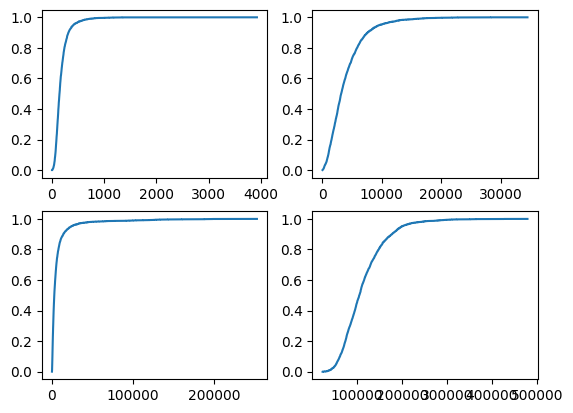

In [8]:
# cdf of a few genes
L = 2
fig, axs = plt.subplots(L, L)
for i in range(L):
    for j in range(L):
        gene = df.columns[i*L + j]
        gene_data = df[gene].sort_values()
        gene_data = gene_data.reset_index(drop=True)
        ecdf = sm.distributions.ECDF(gene_data)
        axs[i, j].step(ecdf.x, ecdf.y)
plt.show()

We visualize the distribution of a few cells and genes to get a feeling for the data

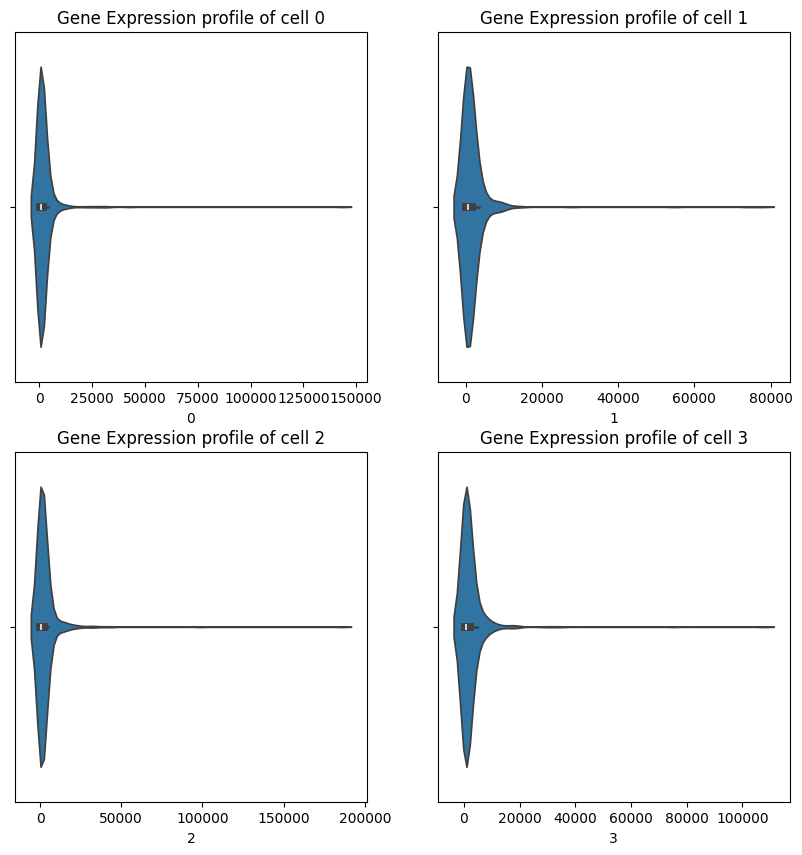

In [9]:
# do the same for the first 9 cells in a grid
L = 2
fig, axs = plt.subplots(L, L, figsize=(10, 10))
for i in range(L):
    for j in range(L):
        sns.violinplot(x=df.iloc[i * L + j, :], ax=axs[i, j])
        axs[i, j].set_title('Gene Expression profile of cell {}'.format(i * L + j))

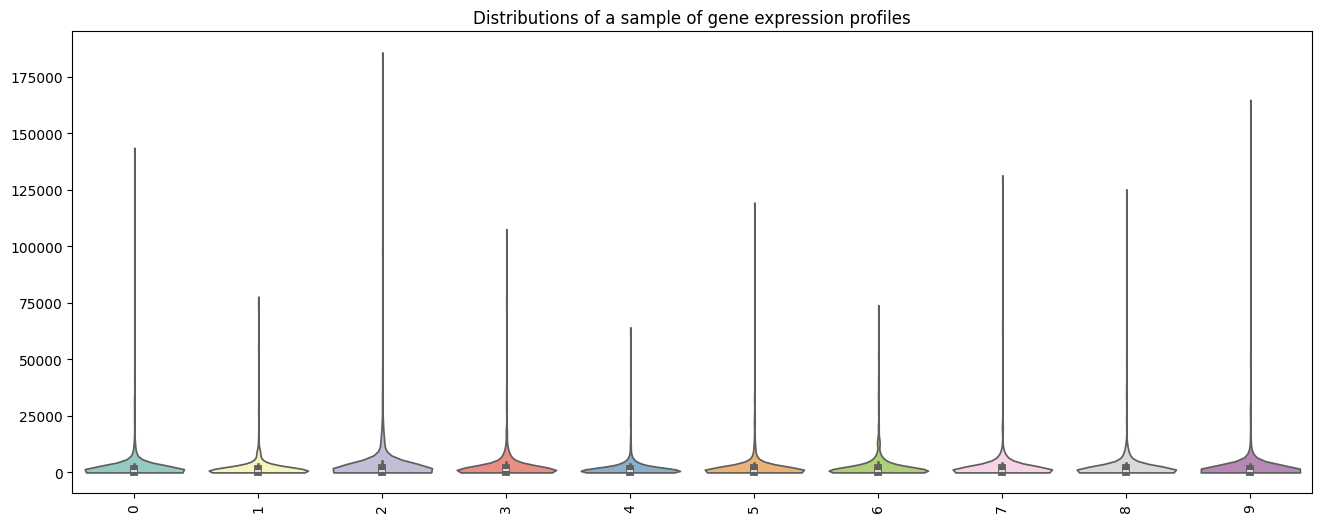

In [10]:
df_small = df.iloc[:10, :].T
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_small, palette='Set3', cut=0)
plt.xticks(rotation=90)
plt.title("Distributions of a sample of gene expression profiles")
plt.show()

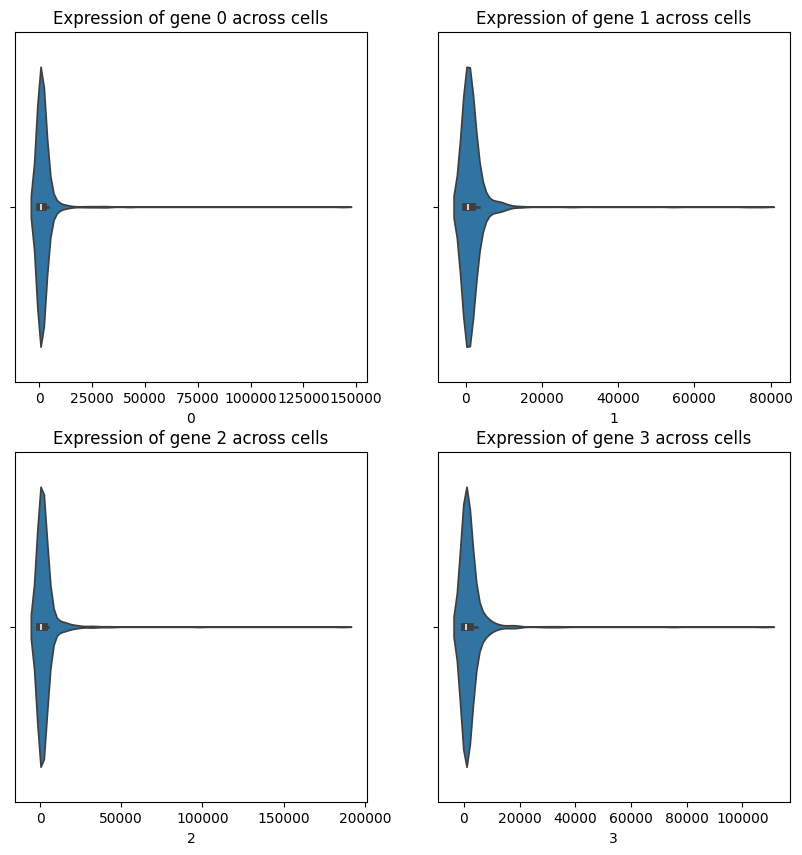

In [11]:
L = 2
fig, axs = plt.subplots(L, L, figsize=(10, 10))
for i in range(L):
    for j in range(L):
        sns.violinplot(x=df.iloc[i * L + j, :], ax=axs[i, j])
        axs[i, j].set_title('Expression of gene {} across cells'.format(i * L + j))

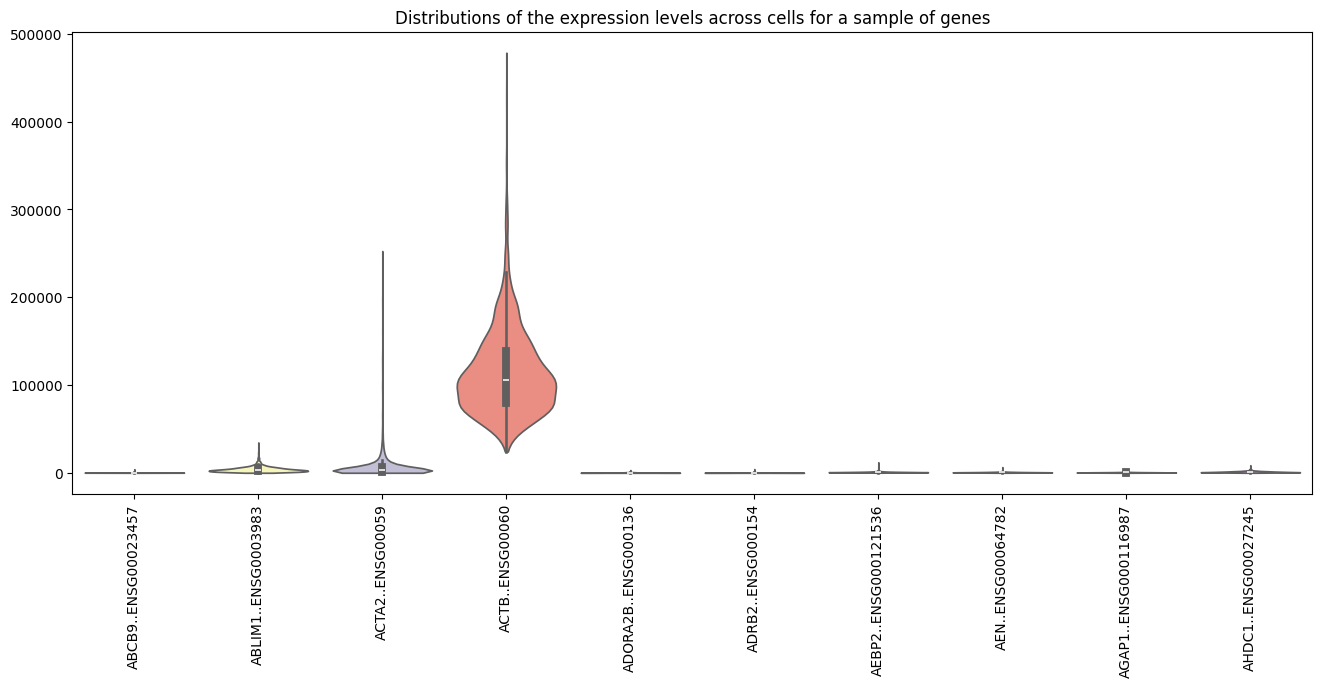

In [12]:
df_small = df.iloc[:, :10]
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_small, palette='Set3', cut=0)
plt.xticks(rotation=90)
plt.title("Distributions of the expression levels across cells for a sample of genes")
plt.show()

In [13]:
print("sparsity level:", (df == 0).sum().sum() / df.size)

sparsity level: 0.02183073369763143


The distributions cover a very long range, spanning multiple orders of magnitude. This might be an indication that the data is more naturally handled in log scale. We proceed to log the data.

In [14]:
df = df + 1
df = df.apply(np.log)
df.head()

,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,AHDC1..ENSG00027245,...,ZBTB38..ENSG000253461,ZBTB7C..ENSG000201501,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134
0,5.934447,7.215137,7.813017,11.874808,5.079377,4.161014,6.853974,6.441707,5.844109,6.078646,...,7.507344,5.581080,5.781805,4.335412,9.054743,3.806482,7.486781,8.579524,6.926901,6.711961
1,5.294532,8.588327,7.835805,11.260971,3.028012,1.275277,7.664805,6.598498,5.959989,7.079042,...,6.270153,2.882507,5.436506,5.778419,8.771449,3.625477,8.073540,8.075308,7.432047,7.047872
2,4.775048,7.569071,9.584294,12.132652,4.569447,5.261996,6.643240,5.550670,5.483182,7.589402,...,7.272697,5.108705,5.445323,4.805102,9.451544,4.321090,7.823210,8.295623,6.829752,5.973018
3,4.123045,8.642697,8.177915,11.586603,4.475457,6.955230,6.550241,5.235063,5.573567,6.606058,...,7.667308,6.029641,6.460857,5.842396,8.990352,4.374894,8.228719,7.898712,7.063964,6.509368
4,5.794467,7.000890,8.140747,11.069254,3.967217,2.350546,6.561045,7.389280,6.712186,6.949722,...,7.064357,5.220280,6.694328,4.829257,7.209111,5.474994,7.542669,7.733859,7.585093,6.175957


In [15]:
df.describe()

,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,AHDC1..ENSG00027245,...,ZBTB38..ENSG000253461,ZBTB7C..ENSG000201501,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134
count,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,...,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000
mean,5.027813,7.974901,7.969045,11.565688,4.650616,3.932039,6.578123,6.240796,5.955885,6.785079,...,7.302806,5.368857,5.888605,5.255410,8.778089,4.571372,7.876275,7.872595,7.024809,6.400346
std,0.626356,0.858968,1.283715,0.404949,1.313455,1.525478,0.506659,0.544390,0.548099,0.671384,...,0.623959,1.578166,0.523837,0.762479,0.580441,0.760368,0.606623,0.459292,0.548695,0.428670
min,2.202930,3.426371,3.435540,10.094930,0.000000,-0.236694,3.084302,4.079519,2.301865,4.077046,...,3.781573,-0.385372,3.549658,0.000000,5.633546,0.336436,4.578454,5.829872,4.182160,4.409763
25%,4.646988,7.504782,7.108789,11.281263,3.690667,2.808957,6.254682,5.900068,5.625751,6.318749,...,6.948576,4.438081,5.563261,4.772332,8.415821,4.059743,7.517777,7.580225,6.675585,6.133246
50%,5.027859,8.061015,7.968105,11.569894,4.824152,3.902163,6.549512,6.262482,5.994350,6.810597,...,7.344228,5.576313,5.904590,5.247498,8.803912,4.606660,7.903264,7.879019,7.010371,6.385818
75%,5.418883,8.558827,8.782255,11.844288,5.702702,5.045088,6.874010,6.601142,6.328758,7.281827,...,7.704253,6.496792,6.226508,5.721994,9.161130,5.100909,8.259424,8.154116,7.382364,6.651586
max,8.273829,10.448972,12.439594,13.078457,8.044607,8.338559,9.387942,8.765176,7.976482,9.055739,...,9.378394,9.051503,8.283070,8.350040,10.528471,7.387480,10.165975,10.028752,9.432203,8.316856


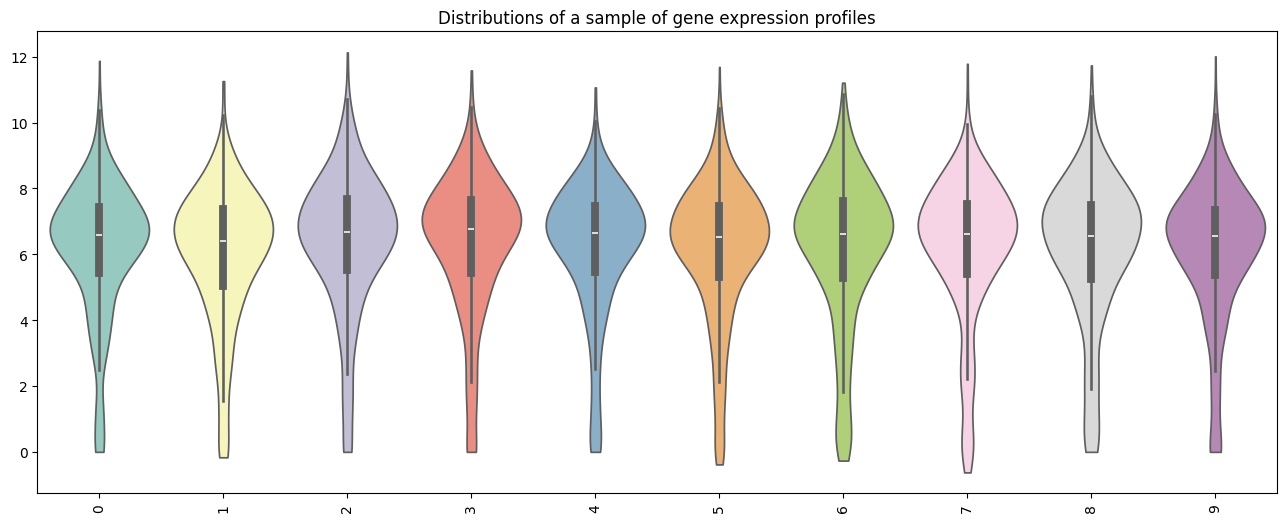

In [16]:
df_small = df.iloc[:10, :].T
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_small, palette='Set3', cut=0)
plt.xticks(rotation=90)
plt.title("Distributions of a sample of gene expression profiles")
plt.show()

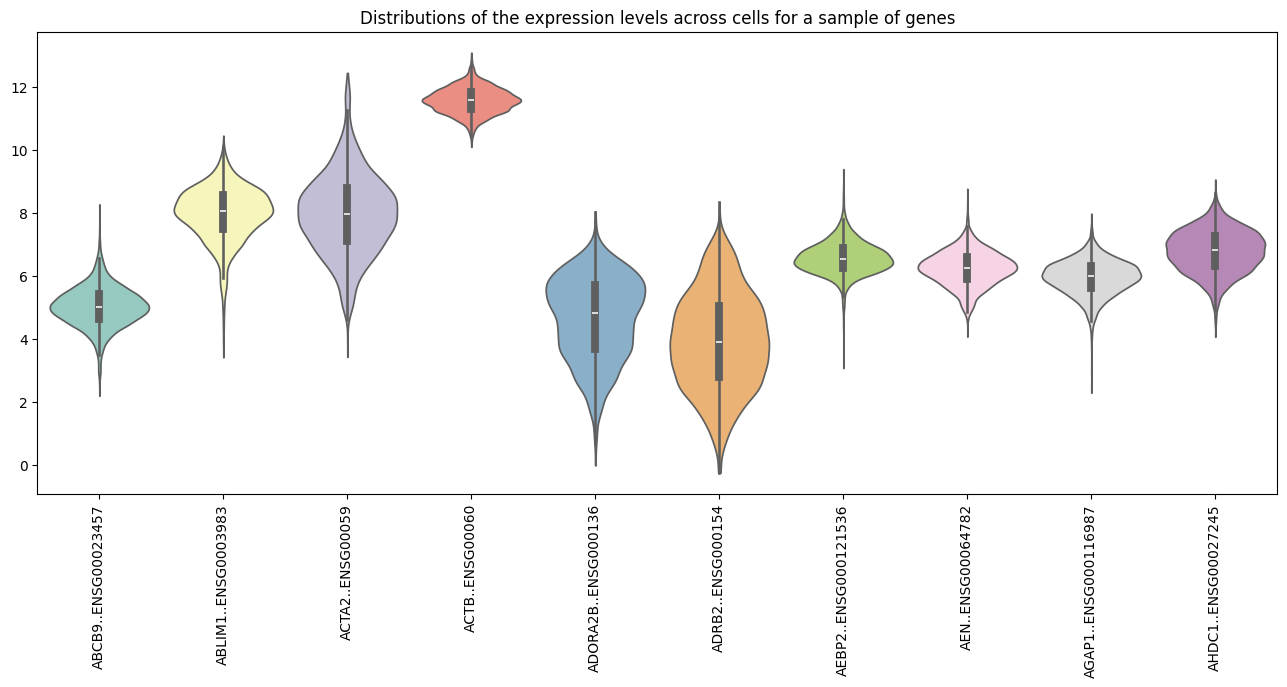

In [17]:
df_small = df.iloc[:, :10]
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_small, palette='Set3', cut=0)
plt.xticks(rotation=90)
plt.title("Distributions of the expression levels across cells for a sample of genes")
plt.show()

To prepare for unsupervised and supervised machine learning algorithms, we also normalize the gene expressions, gene by gene. In fact, as we see from the graph above, different genes have different means and standard deviations, so algorithms risk focusing on some more than others.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
array = scaler.fit_transform(df)
df = pd.DataFrame(array, columns=df.columns)
df.head()

,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,AHDC1..ENSG00027245,...,ZBTB38..ENSG000253461,ZBTB7C..ENSG000201501,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134
0,1.447646,-0.884613,-0.121559,0.763446,0.326477,0.150118,0.544515,0.369101,-0.203957,-1.052329,...,0.327846,0.134490,-0.203906,-1.206731,0.476685,-1.006067,-0.642145,1.539354,-0.178460,0.727020
1,0.425878,0.714228,-0.103805,-0.752572,-1.235518,-1.741801,2.145054,0.657148,0.007488,0.437898,...,-1.655197,-1.575655,-0.863156,0.686013,-0.011440,-1.244144,0.325224,0.441411,0.742282,1.510726
2,-0.403597,-0.472518,1.258411,1.400254,-0.061806,0.871933,0.128538,-1.267854,-0.862544,1.198149,...,-0.048260,-0.164864,-0.846323,-0.590653,1.160385,-0.329199,-0.087487,0.921154,-0.355537,-0.996989
3,-1.444666,0.777533,0.162726,0.051656,-0.133374,1.982035,-0.055037,-1.847666,-0.697616,-0.266677,...,0.584245,0.418754,1.092553,0.769930,0.365736,-0.258430,0.581062,0.056869,0.071368,0.254357
4,1.224136,-1.134066,0.133770,-1.226063,-0.520368,-1.036843,-0.033712,2.109920,1.380025,0.245258,...,-0.382200,-0.094157,1.538300,-0.558970,-2.703400,1.188542,-0.550005,-0.302103,1.021242,-0.523517


In [19]:
df.describe()

,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,AHDC1..ENSG00027245,...,ZBTB38..ENSG000253461,ZBTB7C..ENSG000201501,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134
count,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,...,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03,4.211000e+03
mean,1.555736e-15,-4.758325e-16,-3.678421e-16,-2.682885e-16,-5.239219e-16,-3.610927e-16,1.923578e-16,-5.264529e-16,2.902241e-16,1.149085e-15,...,4.302740e-17,1.147397e-16,4.049638e-16,-9.449155e-17,3.610927e-16,-9.837246e-16,6.665029e-16,1.740501e-15,-1.400500e-16,1.181144e-16
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-4.510562e+00,-5.295972e+00,-3.531972e+00,-3.632389e+00,-3.541172e+00,-2.733064e+00,-6.896626e+00,-3.970557e+00,-6.667505e+00,-4.033989e+00,...,-5.644040e+00,-3.646584e+00,-4.465560e+00,-6.893345e+00,-5.418151e+00,-5.570250e+00,-5.437008e+00,-4.448082e+00,-5.181365e+00,-4.644180e+00
25%,-6.080725e-01,-5.473712e-01,-6.702104e-01,-7.024539e-01,-7.309452e-01,-7.363043e-01,-6.384559e-01,-6.259623e-01,-6.023963e-01,-6.946628e-01,...,-5.677806e-01,-5.898535e-01,-6.211531e-01,-6.336376e-01,-6.241986e-01,-6.729505e-01,-5.910434e-01,-6.366437e-01,-6.365389e-01,-6.231641e-01
50%,7.394250e-05,1.002653e-01,-7.327976e-04,1.038946e-02,1.321378e-01,-1.958719e-02,-5.647691e-02,3.984025e-02,7.018777e-02,3.801168e-02,...,6.639363e-02,1.314692e-01,3.051905e-02,-1.037819e-02,4.449485e-02,4.641426e-02,4.449540e-02,1.398821e-02,-2.631787e-02,-3.389436e-02
75%,6.244316e-01,6.798808e-01,6.335571e-01,6.880706e-01,8.011018e-01,7.297264e-01,5.840663e-01,6.620046e-01,6.803826e-01,7.399737e-01,...,6.434628e-01,7.147972e-01,6.451297e-01,6.120030e-01,6.599933e-01,6.965039e-01,6.316853e-01,6.130188e-01,6.517230e-01,5.861629e-01
max,5.182997e+00,2.880625e+00,3.482923e+00,3.736147e+00,2.584326e+00,2.888960e+00,5.546441e+00,4.637628e+00,3.686992e+00,3.382461e+00,...,3.326874e+00,2.333775e+00,4.571553e+00,4.059123e+00,3.015966e+00,3.704052e+00,3.774953e+00,4.695084e+00,4.388014e+00,4.471364e+00


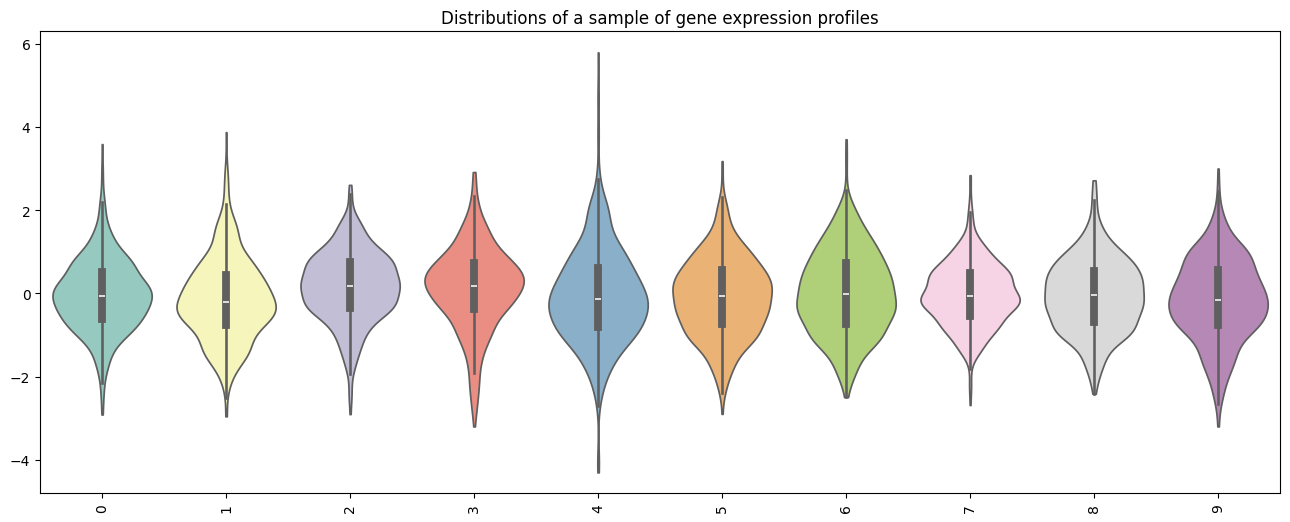

In [20]:
df_small = df.iloc[:10, :].T
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_small, palette='Set3', cut=0)
plt.xticks(rotation=90)
plt.title("Distributions of a sample of gene expression profiles")
plt.show()

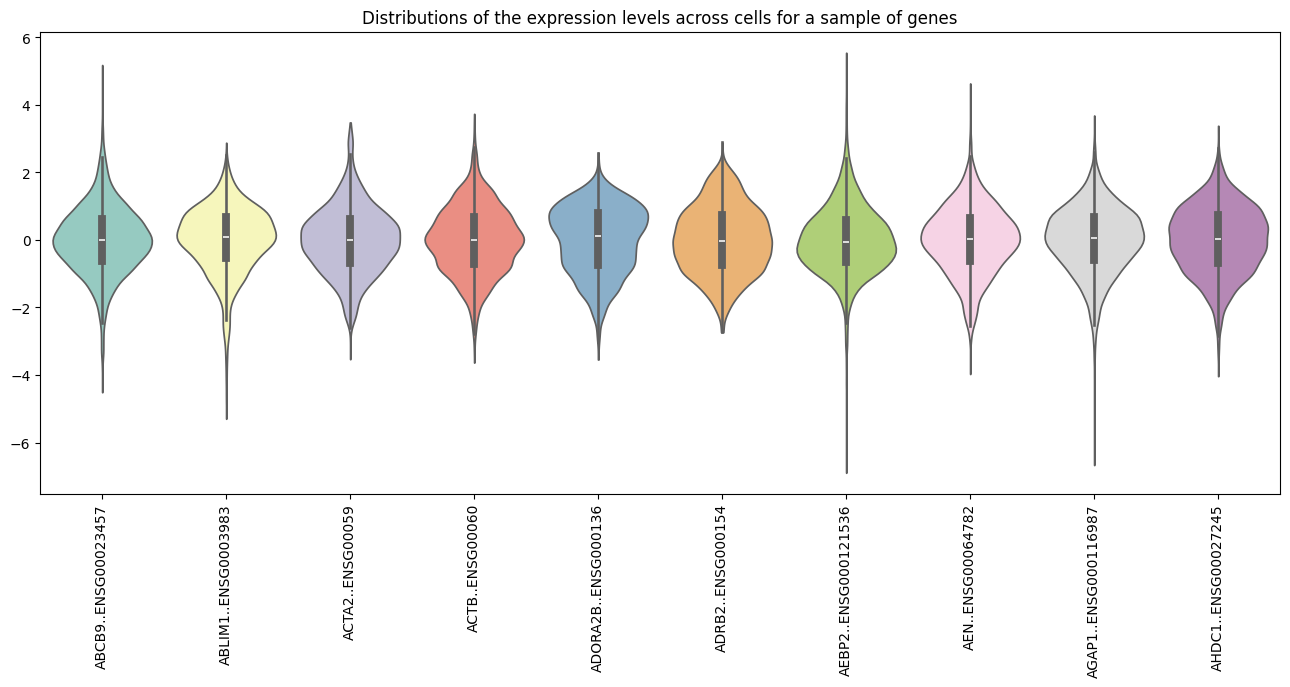

In [21]:
df_small = df.iloc[:, :10]
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_small, palette='Set3', cut=0)
plt.xticks(rotation=90)
plt.title("Distributions of the expression levels across cells for a sample of genes")
plt.show()

## Dimensionality Reduction

### PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
array_pca = pca.transform(df)
df_pca = pd.DataFrame(array_pca, columns=['PC1', 'PC2'])

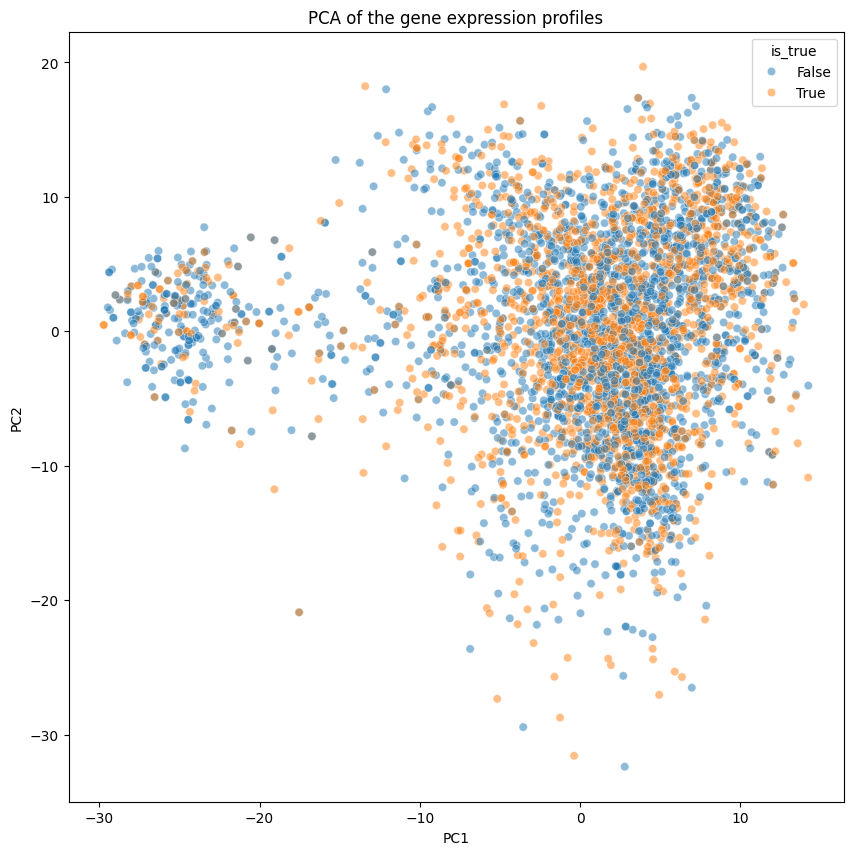

In [45]:
# do the same plot, but label the points with the true and false labels

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df_full['is_true'], alpha=0.5)
plt.title("PCA of the gene expression profiles")
plt.show()


In [24]:
# reconstruction error: reconstruct the data from the first 2 PCs

array_reconstructed = pca.inverse_transform(array_pca)
mse = ((array - array_reconstructed) ** 2).mean()
print("MSE of the reconstruction:", mse)

MSE of the reconstruction: 0.7599185302386201


In [25]:
# explained variance
explained_variance = pca.explained_variance_ratio_.sum()
print("Explained variance:", explained_variance)

Explained variance: 0.24008146976137928


Let's see what happens as the dimensionality varies

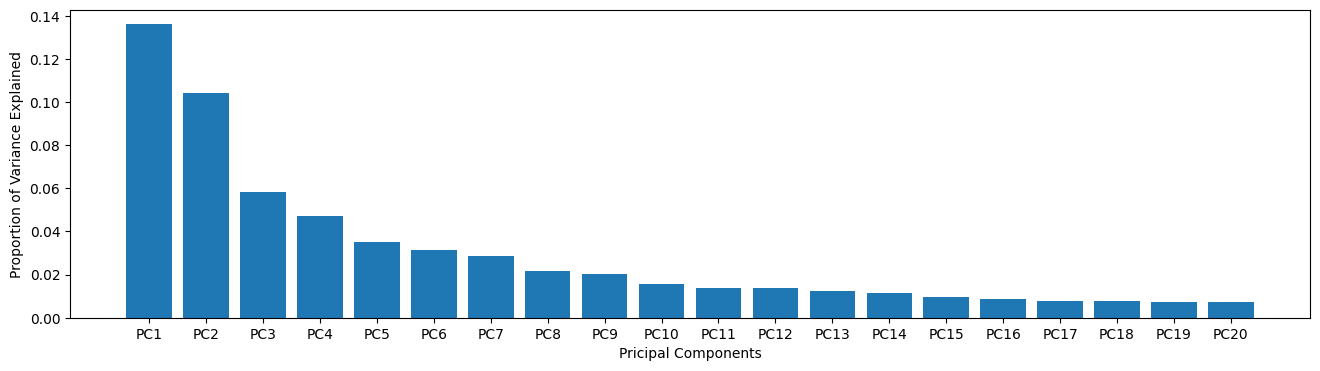

In [29]:
pca = PCA(n_components=551)
pca.fit(df)
array_pca = pca.transform(df)
var = pca.explained_variance_ratio_[0:20]
cum_var = np.cumsum(var)
labels = ["PC"+str(i+1) for i in range(20)]
plt.figure(figsize=(16,4))
plt.bar(labels, var)
plt.xlabel('Pricipal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### tSNE

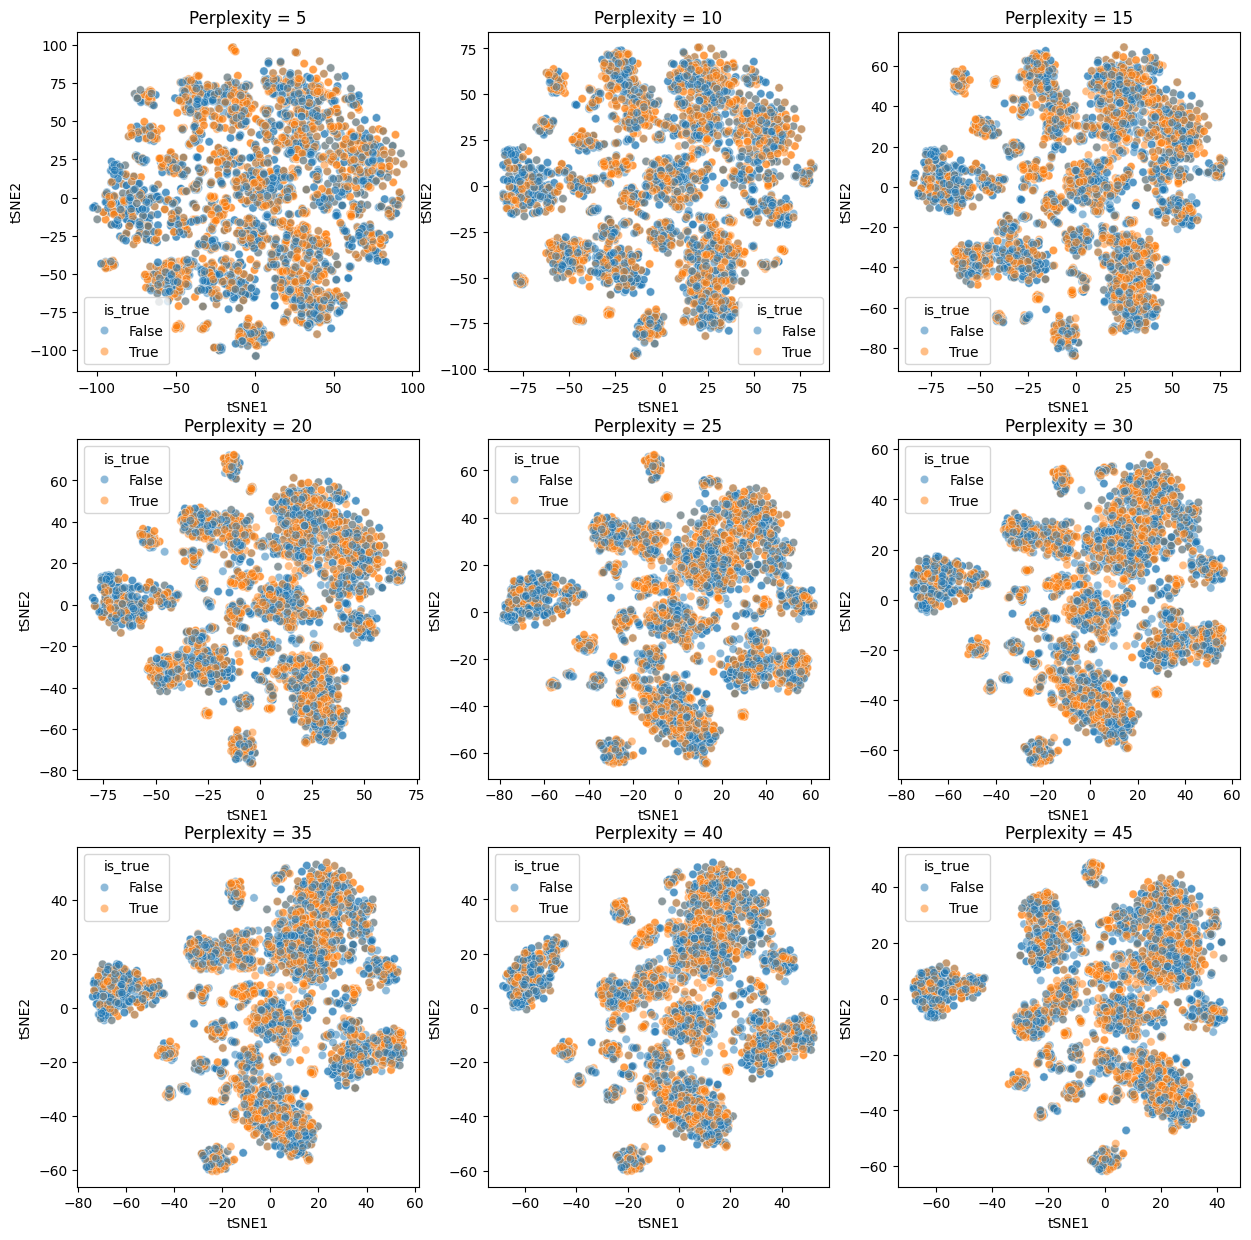

In [52]:
from sklearn.manifold import TSNE

# try many times with different perplexities. plot in a grid
L = 3
fig, axs = plt.subplots(L, L, figsize=(15, 15))
perplexities = [5, 10, 15, 20, 25, 30, 35, 40, 45]
for i in range(L):
    for j in range(L):
        perplexity = perplexities[i * L + j]
        tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000)
        array_tsne = tsne.fit_transform(df)
        df_tsne = pd.DataFrame(array_tsne, columns=['tSNE1', 'tSNE2'])
        sns.scatterplot(x='tSNE1', y='tSNE2', data=df_tsne, hue=df_full['is_true'], alpha=0.5, ax=axs[i, j])
        axs[i, j].set_title('Perplexity = {}'.format(perplexity))

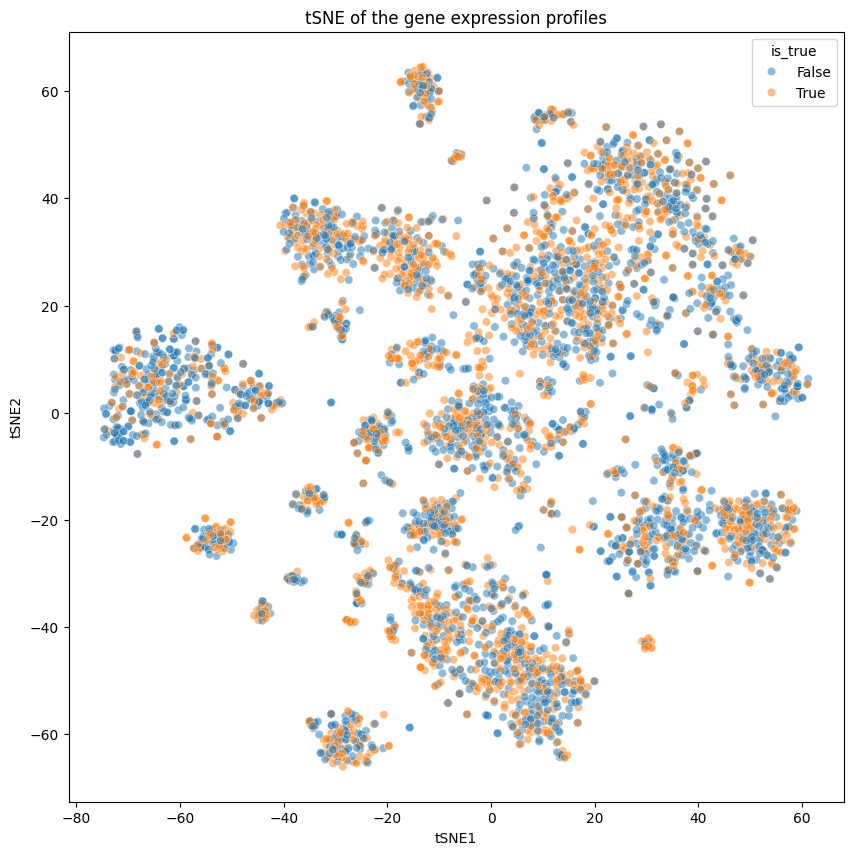

In [53]:
tsne = TSNE(n_components=2, perplexity=25, max_iter=1000)
array_tsne = tsne.fit_transform(df)
df_tsne = pd.DataFrame(array_tsne, columns=['tSNE1', 'tSNE2'])

# plot the tSNE embedding
plt.figure(figsize=(10, 10))
sns.scatterplot(x='tSNE1', y='tSNE2', data=df_tsne, hue=df_full['is_true'], alpha=0.5)
plt.title("tSNE of the gene expression profiles")
plt.show()

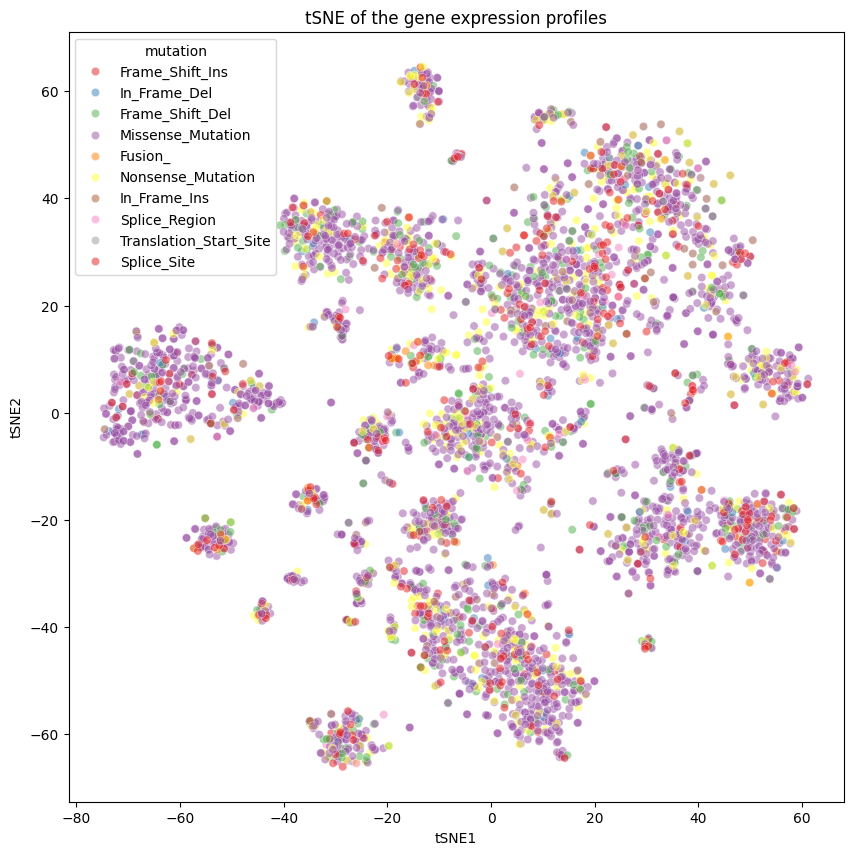

In [59]:
# do the same as above, but label based on mutation column

plt.figure(figsize=(10, 10))
sns.scatterplot(x='tSNE1', y='tSNE2', data=df_tsne, hue=df_full['mutation'], alpha=0.5, palette='Set1')
plt.title("tSNE of the gene expression profiles")
plt.show()